In [1]:
#import necessary librairies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from collections import Counter



In [2]:
data = pd.read_csv("medquad.csv")
print(data.shape)
data.head()

(16412, 4)


,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


In [3]:
len(data["answer"].unique())

15818

### Exploratory data analysis

#### Analyse univariée

In [23]:
train_data, test_data = train_test_split(data,test_size=0.2, random_state = 42)

print(f"Taille du train {len(train_data)}")
print(f"Taille du test {len(test_data)}")


Taille du train 13129
Taille du test 3283


In [24]:
print(f"Le type de chaque colonne : \n  {train_data.dtypes}")
print(f"Y a-t-il des NaN ?\n {train_data.isna().sum()}")

Le type de chaque colonne : 
  question      object
answer        object
source        object
focus_area    object
dtype: object
Y a-t-il des NaN ?
 question      0
answer        5
source        0
focus_area    9
dtype: int64


In [25]:
# Nous allons supprimer les NaN vu qu'il y en a pas beaucoup

train_data = train_data.dropna(axis=0)

In [26]:
train_data

,question,answer,source,focus_area
9657,what research (or clinical trials) is being do...,The NINDS supports research on genetic disorde...,NINDS,Cerebro-Oculo-Facio-Skeletal Syndrome (COFS)
3251,What are the symptoms of Mantle cell lymphoma ?,What are the signs and symptoms of Mantle cell...,GARD,Mantle cell lymphoma
396,What is (are) Breast Cancer ?,A mammogram can often detect breast changes in...,NIHSeniorHealth,Breast Cancer
8250,Who is at risk for Heart Attack? ?,Certain risk factors make it more likely that ...,NHLBI,Heart Attack
6818,How to diagnose Glucose transporter type 1 def...,How is glucose transporter type 1 deficiency s...,GARD,Glucose transporter type 1 deficiency syndrome
...,...,...,...,...
11284,What are the treatments for Langer mesomelic d...,These resources address the diagnosis or manag...,GHR,Langer mesomelic dysplasia
11964,What are the treatments for hereditary xanthin...,These resources address the diagnosis or manag...,GHR,hereditary xanthinuria
5390,What are the symptoms of Hallermann-Streiff sy...,What are the signs and symptoms of Hallermann-...,GARD,Hallermann-Streiff syndrome
860,Who is at risk for Uterine Sarcoma? ?,Being exposed to x-rays can increase the risk ...,CancerGov,Uterine Sarcoma


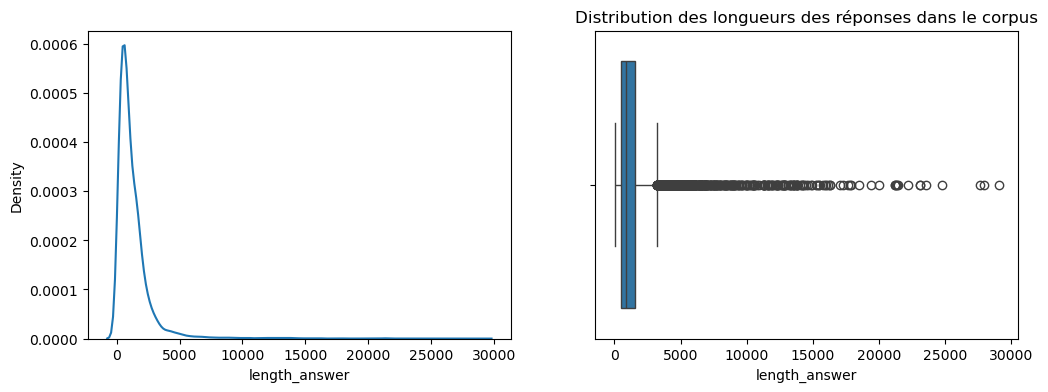

count    13115.000000
mean      1299.291651
std       1663.962491
min          6.000000
25%        485.000000
50%        882.000000
75%       1581.500000
max      29046.000000
Name: length_answer, dtype: float64


In [27]:
# Etude de la longueur des reponses 
train_data["length_answer"] = train_data["answer"].apply(lambda x : len(x) )
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data,x="length_answer")
plt.subplot(1,2,2)
sns.boxplot(data=train_data,x="length_answer")
plt.title("Distribution des longueurs des réponses dans le corpus",loc="center")
plt.show()
print(train_data["length_answer"].describe())

La distribution des longueurs des réponses est fortement asymétrique à droite.

La courbe de densité présente un pic en 0, ce qui montre que de nombreuses réponses sont très courtes.

La distribution possède une queue extrêmement longue au-delà de 5000 caractères.
Ces valeurs ne sont pas forcément aberrantes : dans un corpus textuel, des réponses très longues peuvent être structurellement normales.

Le boxplot est fortement compressé entre 0 et 5000, ce qui reflète l'effet de cette asymétrie : la majorité des réponses ont une longueur relativement modeste mais quelques observations très longues tirent la distribution vers la droite.

La présence d’un grand nombre de valeurs extrêmes nuit à la visualisation en échelle linéaire.

Le boxplot de la longueur des réponses est fortement aplati, ce qui s’explique par la présence de nombreuses valeurs extrêmes. La très grande dispersion des longueurs — allant d’un minimum de 6 à un maximum de 29 046 caractères — est corroborée par un écart-type très élevé (1 663).

La moyenne (1 299) est nettement supérieure à la médiane (882), ce qui traduit une distribution asymétrique à droite, typique des corpus textuels où une petite proportion de réponses très longues tire la distribution vers le haut.

Ainsi, la variable length_answer présente une forte hétérogénéité. Une remise à l’échelle ou une transformation (par exemple un log-transform) sera probablement nécessaire pour éviter que les valeurs extrêmes n’influencent trop l’apprentissage du modèle.

In [28]:
print(train_data["source"].unique())
print(len(train_data["focus_area"].unique()))
train_data.head(2)

['NINDS' 'GARD' 'NIHSeniorHealth' 'NHLBI' 'GHR' 'MPlusHealthTopics'
 'CancerGov' 'NIDDK' 'CDC']
4610


,question,answer,source,focus_area,length_answer
9657,what research (or clinical trials) is being do...,The NINDS supports research on genetic disorde...,NINDS,Cerebro-Oculo-Facio-Skeletal Syndrome (COFS),155
3251,What are the symptoms of Mantle cell lymphoma ?,What are the signs and symptoms of Mantle cell...,GARD,Mantle cell lymphoma,1625


On va analyser les reponses par source de provenance

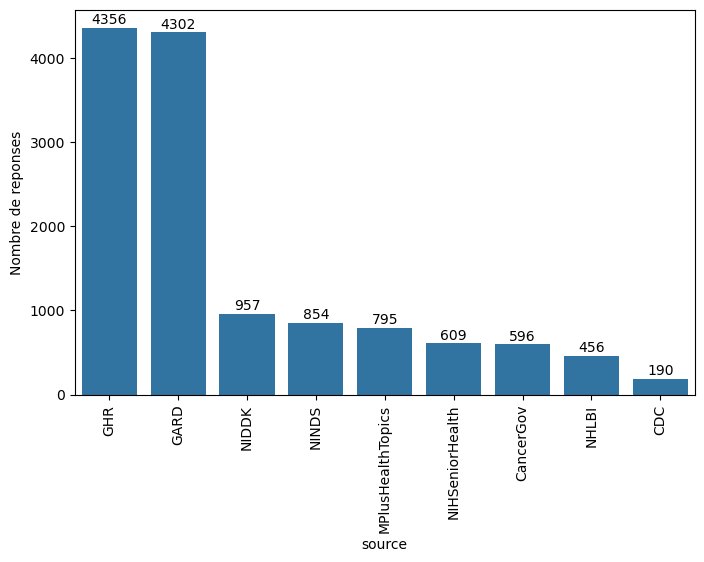

In [29]:
ax = train_data["source"].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=ax.index, y=ax.values)
plt.xticks(rotation=90)
plt.ylabel("Nombre de reponses")

for i, v in enumerate(ax.values):
    plt.text(i, v + 50, str(v), ha='center')
plt.show()

Les principales reponses proviennent de GHR (Genetics Home Reference) et GARD (Genetic and Rare Diseases Information Center) avec des occurences au dessus de 4000
Les données provenant de CDC sont quant à elles minoritaires avec des 190 reponses

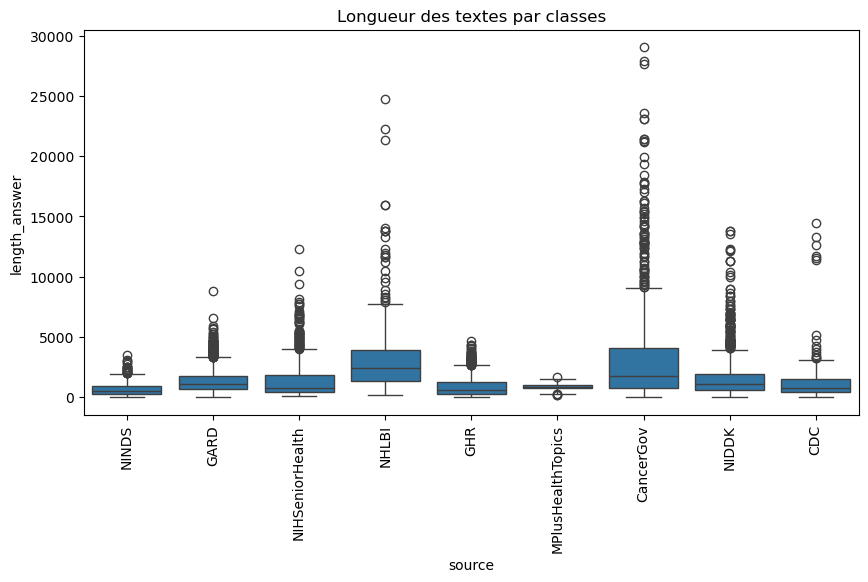

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_data,x="source",y="length_answer")
plt.title("Longueur des textes par classes")
plt.xticks(rotation=90)
plt.show()


On remarque que MPIPlusHealthTopics a un boxplot très aplati.
CancerGov a le boxplot le plus étalé indiquant une plus grande variété dans la longueur de reponse.


In [31]:
def top_words(texts,n=20):
    words=" ".join(texts).lower().split()
    return Counter(words).most_common(n)

for label in sorted(train_data["source"].unique()):
    print(f"Classe {label} :")
    print(top_words(train_data[train_data["source"]==label]["answer"],20))
    print("-"*50)

Classe CDC :
[('the', 1893), ('of', 1312), ('and', 1136), ('in', 944), ('to', 935), ('a', 701), ('is', 662), ('or', 600), ('for', 544), ('be', 494), ('with', 472), ('are', 455), ('-', 355), ('that', 319), ('can', 303), ('not', 291), ('may', 283), ('by', 281), ('as', 278), ('have', 236)]
--------------------------------------------------
Classe CancerGov :
[('the', 23351), ('of', 12302), ('-', 8385), ('a', 7656), ('to', 7599), ('and', 7019), ('cancer', 6386), ('in', 6335), ('or', 6191), ('is', 5811), ('are', 4629), ('may', 3970), ('clinical', 3851), ('that', 3686), ('treatment', 3601), ('for', 3549), ('be', 2996), ('trials', 2438), ('with', 2304), ('cells', 1895)]
--------------------------------------------------
Classe GARD :
[('the', 55246), ('of', 40303), ('a', 22855), ('-', 21462), ('is', 18388), ('in', 17780), ('and', 17691), ('or', 10660), ('to', 9973), ('may', 8844), ('people', 8590), ('be', 8501), ('that', 8303), ('are', 8150), ('for', 7630), ('symptoms', 7431), ('information',

L’analyse des mots les plus fréquents montre que :

Les stopwords dominent naturellement les corpus textuels, mais les mots thématiques diffèrent fortement selon la source.

Chaque organisme présente une signature lexicale cohérente avec son domaine :

Cancer.gov → cancer, traitements, essais cliniques

GHR → génétique, gènes, hérédité

GARD → symptômes, maladies rares, patients

NHLBI → cœur, sang

NINDS → neurologie, cerveau

Les sources centrées sur le patient (MedlinePlus, NIHSeniorHealth, NHLBI) utilisent fréquemment you / your

Les sources scientifiques (Cancer.gov, GHR, GARD) utilisent du vocabulaire plus technique.

Cette hétérogénéité lexicale confirme que le modèle devra gérer des styles et niveaux de technicité très variés, ce qui peut influencer les performances selon la tâche (classification, QA, summarization…).

In [32]:
print("Nombres de doublons : ", train_data.duplicated(subset="answer").sum())
short_texts=train_data[train_data["length_answer"]<=2]
print(f"Textes très courts : :{len(short_texts)}")
print(short_texts.head())

Nombres de doublons :  455
Textes très courts : :0
Empty DataFrame
Columns: [question, answer, source, focus_area, length_answer]
Index: []


L'étude des doublons n'est pas necessaire pour cette problématique

### Preprocessing